In [1]:
import os
import fitsio
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

from   astropy.table import Table
from   cosmo import cosmo
from   fsky import fsky

In [2]:
field = 'G9'
realz = 0

In [3]:
fpath = os.environ['CSCRATCH'] + '/desi/BGS/Sam/randoms_bd_{}_{}.fits'.format(field, realz)

In [4]:
print(fpath)

/global/cscratch1/sd/mjwilson/desi/BGS/Sam/randoms_bd_G9_0.fits


In [9]:
! ls -lt /global/cscratch1/sd/mjwilson/desi/BGS/Sam/

total 378036
-rw-rw---- 1 mjwilson desi 157700160 Dec 13 15:22 randoms_bd_G9_0.fits
-rw-rw---- 1 mjwilson desi 119471040 Dec 13 14:14 randoms_N8_G9_0.fits
-rw-rw---- 1 mjwilson desi 109915200 Dec 13 13:52 randoms_G9_0.fits
drwxrws--- 2 mjwilson desi      4096 Dec 13 13:50 safe


In [10]:
rand = Table(fitsio.read(fpath))

In [40]:
len(rand) / 1.e6

2.389276

In [12]:
rand

RANDOM_RA,RANDOM_DEC,Z,V,RANDID,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,IS_BOUNDARY,N8,BOUND_DIST,BOUND_ID
float32,float32,float32,float32,int64,str2,float32,float32,float32,int64,int32,float64,int64
138.2987,0.35264316,0.43702155,7124808700.0,452117,G9,1191.7124,68.77561,-2.9871309,0,225,48.178722510780744,85991
130.64842,1.3154217,0.41294527,6112251000.0,262693,G9,1130.86,-85.95399,16.232407,0,221,30.380395227769238,1742733
136.15184,-1.6327438,0.53846085,12407719000.0,1050211,G9,1434.8702,28.966003,-53.36468,0,217,8.609179034087328,550987
138.87497,-0.09997377,0.48917836,9633690000.0,931065,G9,1316.8862,89.30244,-13.72309,0,210,42.95014681750597,1878078
135.83478,-1.600642,0.35350975,3994248000.0,739567,G9,983.5078,14.408404,-36.023373,0,193,6.266211370344397,446441
133.25084,1.4803466,0.29858813,2497500000.0,1426437,G9,841.15027,-25.619097,14.450108,0,202,21.777933702393984,577139
131.73303,2.2751565,0.27749953,2033072500.0,1782996,G9,784.2261,-44.69159,24.398682,0,223,10.330840218207676,664219
130.37657,0.49239025,0.4292382,6787524600.0,2278058,G9,1170.7428,-94.585434,-0.05827263,0,224,26.273266594862406,2319482
133.48547,1.978975,0.4767481,8996182000.0,65293,G9,1289.319,-33.983154,33.37505,0,233,21.931672412966996,2212885


(-3.0, 4.0)

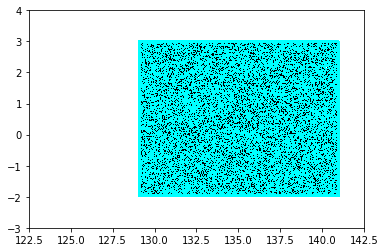

In [13]:
pl.plot(rand['RANDOM_RA'][::10], rand['RANDOM_DEC'][::10], marker=',', lw=0.0, c='k')
pl.plot(rand['RANDOM_RA'][rand['IS_BOUNDARY'].astype(bool)], rand['RANDOM_DEC'][rand['IS_BOUNDARY'].astype(bool)], marker=',', lw=0.0, c='cyan')

pl.xlim(122.5, 142.5)
pl.ylim(-3., 4.)

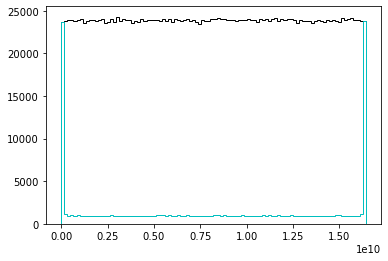

In [14]:
_ = pl.hist(rand['V'], bins=100, histtype='step', color='k')
_ = pl.hist(rand['V'][rand['IS_BOUNDARY'].astype(bool)], bins=100, histtype='step', color='c')

(0.0, 0.6)

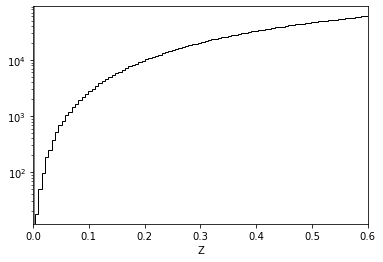

In [15]:
_ = pl.hist(rand['Z'], bins=100, histtype='step', color='k')
pl.axvline(300. / 2.9979e5, lw=0.5, c='k')
pl.yscale('log')
pl.xlabel('Z')

pl.xlim(0.0, 0.6)

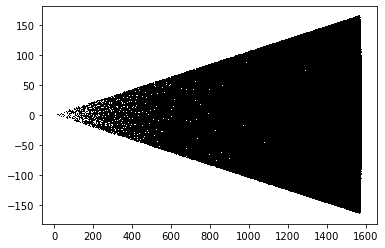

In [16]:
pl.plot(rand['CARTESIAN_X'][::10], rand['CARTESIAN_Y'][::10], marker=',', lw=0.0, c='k')

Text(0, 0.5, 'y')

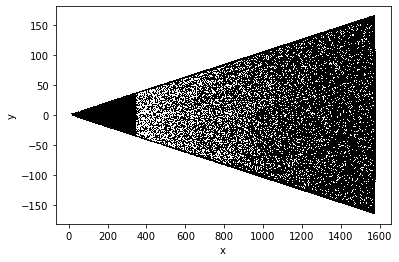

In [17]:
pl.plot(rand['CARTESIAN_X'][rand['IS_BOUNDARY'].astype(bool)], rand['CARTESIAN_Y'][rand['IS_BOUNDARY'].astype(bool)], marker=',', lw=0.0, c='k')
pl.xlabel('x')
pl.ylabel('y')

(0.0, 1600.0)

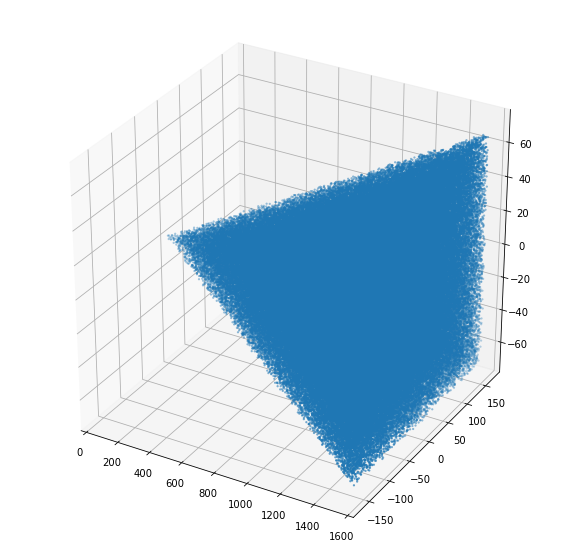

In [18]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(rand['CARTESIAN_X'][::10],\
           rand['CARTESIAN_Y'][::10],\
           rand['CARTESIAN_Z'][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1600.)

(0.0, 1600.0)

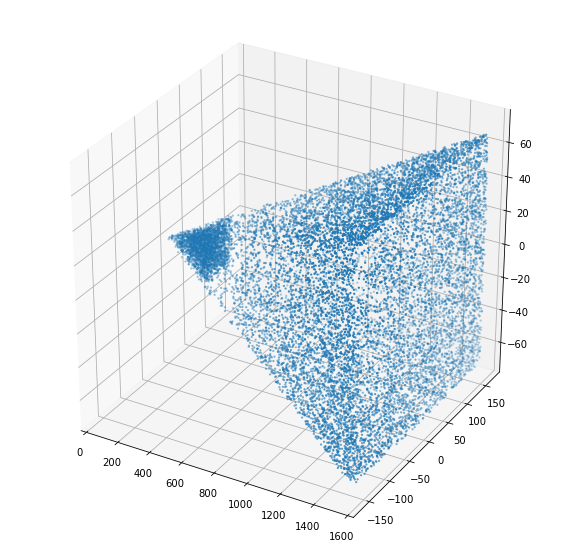

In [19]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(rand['CARTESIAN_X'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           rand['CARTESIAN_Y'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           rand['CARTESIAN_Z'][rand['IS_BOUNDARY'].astype(bool)][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1600.)

In [20]:
np.mean(rand['V'] < np.percentile(rand['V'], 1.))

0.010000100448838894

In [21]:
np.mean(rand['IS_BOUNDARY'].data)

0.05878349759508738

In [22]:
rand['N8'].data.min(), rand['N8'].data.max()

(7, 294)

In [23]:
vol  = fsky(5. * 12.) * (cosmo.comoving_volume(0.6).value - cosmo.comoving_volume(0.0).value)
vol8 = (4./3.)*np.pi*(8.**3.)

rand_density = len(rand) / vol

nrand_sphere8 = vol8 * rand_density
perror_sphere8 = np.sqrt(nrand_sphere8)

print('{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}'.format(len(rand) / 1.e6, rand_density, nrand_sphere8, perror_sphere8))

2.389	0.100	214.466	14.645


(50.0, 300.0)

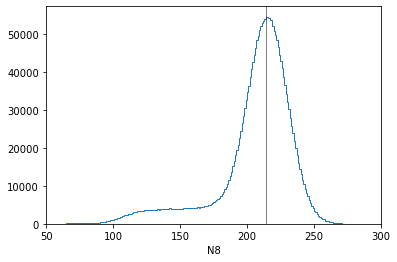

In [36]:
_ = pl.hist(rand['N8'], bins=np.arange(0, 300, 1), histtype='step')
pl.axvline(nrand_sphere8, c='k', lw=0.5)
pl.xlabel('N8')
pl.xlim(50., 300.)

In [39]:
100. * np.sqrt(nrand_sphere8) / nrand_sphere8

6.828426960960291

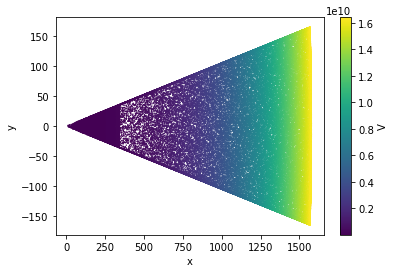

In [27]:
isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_X'][isin], rand['CARTESIAN_Y'][isin], lw=0.0, c=rand['V'][isin], s=2)
pl.xlabel('x')
pl.ylabel('y')
pl.colorbar(label='V')

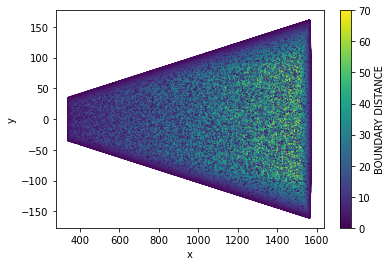

In [28]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_X'][isin], rand['CARTESIAN_Y'][isin], lw=0.0, c=rand['BOUND_DIST'][isin], s=2, vmin=0., vmax=70.)
pl.xlabel('x')
pl.ylabel('y')
pl.colorbar(label='BOUNDARY DISTANCE')

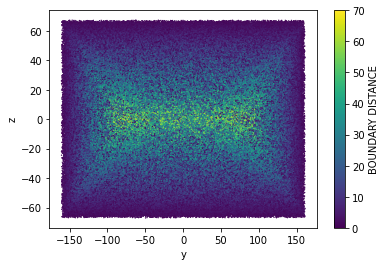

In [29]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_Y'][isin], rand['CARTESIAN_Z'][isin], lw=0.0, c=rand['BOUND_DIST'][isin], s=2, vmin=0., vmax=70.)
pl.xlabel('y')
pl.ylabel('z')
pl.colorbar(label='BOUNDARY DISTANCE')

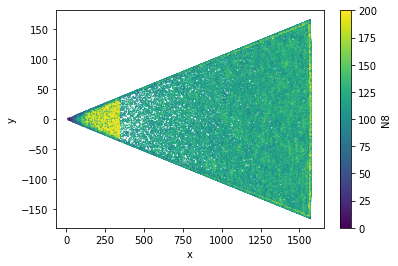

In [30]:
isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['CARTESIAN_X'][isin], rand['CARTESIAN_Y'][isin], lw=0.0, c=rand['N8'][isin], vmin=0, vmax=200, s=2)
pl.xlabel('x')
pl.ylabel('y')
pl.colorbar(label='N8')

Text(0, 0.5, 'Random $N_8 / <N_8>$')

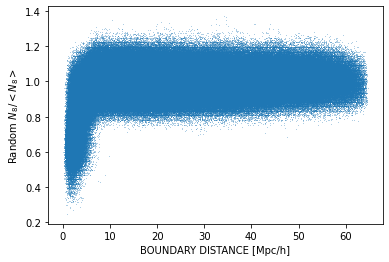

In [37]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['BOUND_DIST'][isin], rand['N8'][isin] / nrand_sphere8, marker='.', lw=0.0, s=1)

pl.xlabel('BOUNDARY DISTANCE [Mpc/h]')
pl.ylabel(r'Random $N_8 / <N_8>$')

Text(0.5, 0, 'BOUND_DIST [Mpc/h]')

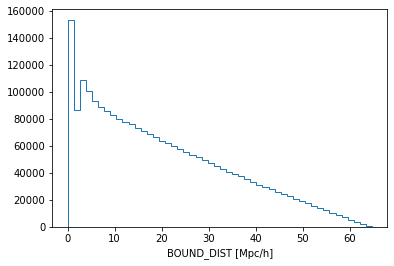

In [32]:
_ = pl.hist(rand['BOUND_DIST'], bins=50, histtype='step')
pl.xlabel('BOUND_DIST [Mpc/h]')

# Done.